In [1]:
print('Задача 1')
'''
1. Импортируйте библиотеки pandas и numpy. Загрузите "Boston House Prices dataset" из встроенных наборов данных 
библиотеки sklearn. Создайте датафреймы X и y из этих данных. Разбейте эти датафреймы на тренировочные 
(X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой
выборки составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42. Создайте модель линейной 
регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model. Обучите модель на 
тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых. Вычислите R2 полученных 
предказаний с помощью r2_score из модуля sklearn.metrics. 
'''
import numpy as np
import pandas as pd

Задача 1


In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [7]:
data.shape

(10000, 19)

In [8]:
data=data.drop('Healthcare_1',axis=1)
data.loc[data['HouseYear']>2021]

KeyError: "['Healthcare_1'] not found in axis"

In [9]:
data.loc[data['HouseYear']==4968,'HouseYear']=1968
data.loc[data['HouseYear']==20052011,'HouseYear']=2008

In [10]:
data.loc[data['HouseYear']>2021]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price


In [13]:
data.loc[data['Rooms']>5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price


In [12]:
data.loc[data['Rooms']==10,'Rooms']=1
data.loc[data['Rooms']==19,'Rooms']=1   
data.loc[data['Rooms']==6,'Rooms']=1            

In [14]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.886400,56.315775,37.199645,6.273300,8.526700,12.609400,1984.86600,0.118858,24.687000,5352.157400,8.039200,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.812995,21.058732,86.241209,28.560917,5.241148,6.775974,18.41187,0.119025,17.532614,4006.799803,23.831875,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1910.00000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1974.00000,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1977.00000,0.075424,25.000000,5285.000000,2.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2001.00000,0.195781,36.000000,7227.000000,5.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,5.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2020.00000,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,633233.466570


In [17]:
data.loc[data['Rooms']<1.0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price


In [16]:
data.loc[data['Square']==2.377248,'LifeSquare']=8.7
data.loc[data['Square']==2.377248,'Square']=23.7
data.loc[data['Rooms']==0,'Rooms']=1  

In [64]:
data.loc[data['Square']<10]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price


In [63]:
data.loc[data['Id']==7657,'Square']=45.02
data.loc[data['Id']==7657,'LifeSquare']=34.63

In [ ]:
data.loc[data['Square']<(data['LifeSquare']),'LifeSquare']=data['Square']/1.3

In [51]:
data.loc[data['Square']<(data['LifeSquare'])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price


In [50]:
data.loc[data['Square']<(data['LifeSquare']),'LifeSquare']=data['Square']/1.3

In [23]:
def fillna_lifesquare(df,df_source):
    df['LifeSquare']= df['LifeSquare'].fillna(df_source['Square']/1.25)
    return df

In [24]:
data=fillna_lifesquare(data,data)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(7), int64(9), object(3)
memory usage: 1.4+ MB


In [32]:
test=pd.read_csv('test.csv')

In [66]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.887200,56.343137,38.009420,6.273300,8.526700,12.609400,1984.86600,0.118858,24.687000,5352.157400,8.039200,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.811629,20.997797,18.859573,28.560917,5.241148,6.775974,18.41187,0.119025,17.532614,4006.799803,23.831875,1.493601,4.806341,92872.293865
min,0.00000,0.000000,1.000000,11.300000,0.370619,0.000000,1.000000,0.000000,1910.00000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.783182,25.207073,1.000000,4.000000,9.000000,1974.00000,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.509275,34.274681,6.000000,7.000000,13.000000,1977.00000,0.075424,25.000000,5285.000000,2.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.894295,47.231645,9.000000,12.000000,17.000000,2001.00000,0.195781,36.000000,7227.000000,5.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,5.000000,641.065193,638.163193,2014.000000,42.000000,117.000000,2020.00000,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,633233.466570


In [68]:
import csv

In [69]:
data.loc[:].to_csv('traner_clear.csv')

In [70]:
pd.read_csv('traner_clear.csv')

,Unnamed: 0,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
0,0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,8.903972e-02,B,B,33,7976,5,0,11,B,184966.930730
1,1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,6.998930e-05,B,B,46,10309,1,1,16,B,300009.450063
2,2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,4.963726e-02,B,B,34,7759,0,1,3,B,220925.908524
3,3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,4.378852e-01,B,B,23,5735,3,0,5,B,175616.227217
4,4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,1.233889e-02,B,B,35,5776,1,2,4,B,150226.531644
5,5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,3.094791e-01,B,B,35,7715,4,0,6,B,215898.447742
6,6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,4.605564e-01,B,B,20,4386,14,1,5,B,296021.204377
7,7,11993,74,2.0,80.312926,64.250341,0.0,14,0.0,1977,7.577876e-02,B,B,6,1437,3,0,2,B,221244.156664
8,8,5172,1,2.0,64.511437,51.609150,1.0,9,17.0,1977,7.122317e-03,B,B,1,264,0,0,1,B,229102.795999
9,9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,7.577876e-02,B,B,6,1437,3,0,2,B,95380.220993


Данные подготовлены. Начинаем анализ.

In [72]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('fivethirtyeight')

In [73]:
train,valid=train_test_split(data,test_size=0.3, random_state=42)

In [74]:
train.shape, valid.shape

((7000, 19), (3000, 19))

In [75]:
scaler=MinMaxScaler()

In [76]:
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [93]:
train_scaled=scaler.fit_transform(train.loc[:,['HouseYear','DistrictId']])

In [94]:
train_scaled

array([[0.9537037 , 0.11004785],
       [0.60185185, 0.11004785],
       [0.68518519, 0.41626794],
       ...,
       [0.60185185, 0.00478469],
       [0.56481481, 0.44976077],
       [0.75      , 0.00956938]])

In [95]:
inertia_arr=[]
for i in range(2,10):
    temp_model=KMeans(n_clusters=i,random_state=10)
    temp_model.fit(train_scaled)
    temp_inertia=temp_model.inertia_
    print(temp_inertia)
    inertia_arr.append(temp_inertia)

275.66445745306356
154.21399483107405
118.34653985063
89.93815634345562
75.4878225357024
63.44980601799889
56.390049259308356
50.1381026040667


Text(0.5, 1.0, 'INERTIA')

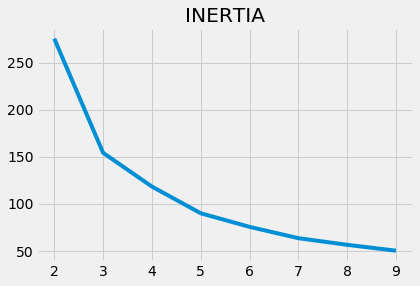

In [96]:
plt.plot([i for i in range(2,10)],inertia_arr)
plt.title('INERTIA')

In [81]:
train_scaled2=scaler.fit_transform(train.loc[:,['HouseYear','DistrictId', 'Square']])

In [82]:
train_scaled2

array([[0.9537037 , 0.11004785, 0.04720853],
       [0.60185185, 0.11004785, 0.25335103],
       [0.68518519, 0.41626794, 0.04387264],
       ...,
       [0.60185185, 0.00478469, 0.11751313],
       [0.56481481, 0.44976077, 0.06357882],
       [0.75      , 0.00956938, 0.12620942]])

In [83]:
inertia_arr2=[]
for i in range(2,10):
    temp_model=KMeans(n_clusters=i,random_state=10)
    temp_model.fit(train_scaled2)
    temp_inertia2=temp_model.inertia_
    print(temp_inertia2)
    inertia_arr2.append(temp_inertia2)

284.0161686785793
162.41958320394733
126.53959653333067
98.05629300877598
83.56650953290023
71.53058077802311
64.47646805991366
58.203745112221526


Text(0.5, 1.0, 'INERTIA')

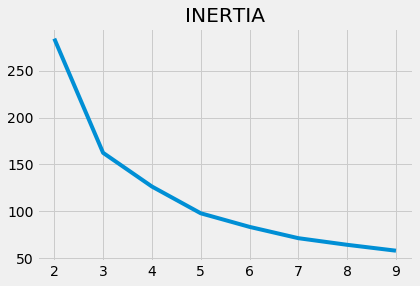

In [84]:
plt.plot([i for i in range(2,10)],inertia_arr2)
plt.title('INERTIA')

In [97]:
from sklearn.cluster import AgglomerativeClustering

In [98]:
model=AgglomerativeClustering(n_clusters=5)

In [99]:
train['cluster_year']=model.fit_predict(train_scaled)

Text(0.5, 1.0, 'Train')

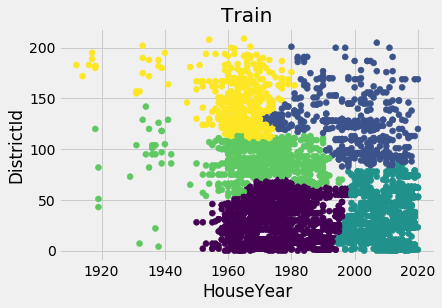

In [100]:
plt.scatter(train['HouseYear'],train['DistrictId'],c=train['cluster_year'])
plt.xlabel('HouseYear')
plt.ylabel('DistrictId')
plt.title('Train')

In [89]:
train['cluster_year']=model.fit_predict(train_scaled2)

Text(0.5, 1.0, 'Train')

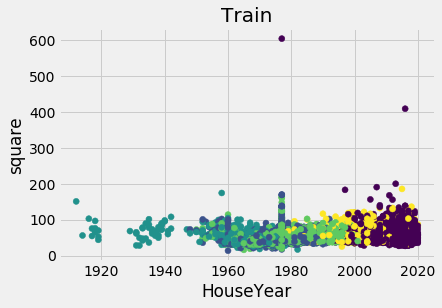

In [91]:
plt.scatter(train['HouseYear'],train['Square'],c=train['cluster_year'])
plt.xlabel('HouseYear')
plt.ylabel('square')
plt.title('Train')

In [101]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 9069 to 7270
Data columns (total 20 columns):
Id               7000 non-null int64
DistrictId       7000 non-null int64
Rooms            7000 non-null float64
Square           7000 non-null float64
LifeSquare       7000 non-null float64
KitchenSquare    7000 non-null float64
Floor            7000 non-null int64
HouseFloor       7000 non-null float64
HouseYear        7000 non-null int64
Ecology_1        7000 non-null float64
Ecology_2        7000 non-null object
Ecology_3        7000 non-null object
Social_1         7000 non-null int64
Social_2         7000 non-null int64
Social_3         7000 non-null int64
Helthcare_2      7000 non-null int64
Shops_1          7000 non-null int64
Shops_2          7000 non-null object
Price            7000 non-null float64
cluster_year     7000 non-null int64
dtypes: float64(7), int64(10), object(3)
memory usage: 1.1+ MB


In [102]:
from sklearn.neighbors import KNeighborsClassifier

In [103]:
knn=KNeighborsClassifier(n_neighbors=5)

In [104]:
knn.fit(train_scaled,train['cluster_year'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [105]:
valid_scaled=scaler.transform(valid.loc[:,['HouseYear','DistrictId']])

In [106]:
valid['cluster_year']=knn.predict(valid_scaled)

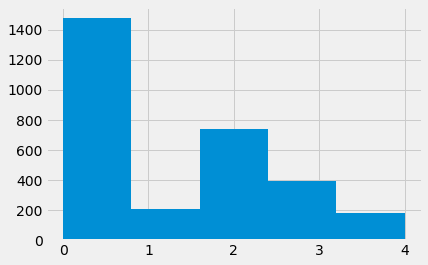

In [107]:
valid['cluster_year'].hist(bins=5);

In [108]:
distr_info1=train['DistrictId'].value_counts().reset_index().rename(columns={'DistrictId':'large_district','index':'DistrictId'})

In [110]:
distr_info1.head()

,DistrictId,large_district
0,27,574
1,1,466
2,23,394
3,6,355
4,9,222


In [111]:
distr_info1['is_large']=(distr_info1['large_district']>50).astype(int)

In [112]:
distr_info1

,DistrictId,large_district,is_large
0,27,574,1
1,1,466,1
2,23,394,1
3,6,355,1
4,9,222,1
5,62,175,1
6,30,160,1
7,53,133,1
8,58,118,1
9,21,107,1


In [113]:
distr_info1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 3 columns):
DistrictId        202 non-null int64
large_district    202 non-null int64
is_large          202 non-null int32
dtypes: int32(1), int64(2)
memory usage: 4.0 KB


In [114]:
def add_distr_info(df,distr_info1):
    df=pd.merge(df,distr_info1,on='DistrictId',how='left')
    df['is_large']=df['is_large'].fillna(0)
    df['large_district']=df['large_district'].fillna(1)
    return df

In [115]:
price=train['Price'].mean()
price

214449.1673897029

In [116]:
price_mean_by_rooms= train.groupby(['Rooms'],as_index=False).agg({'Price':'mean'}).rename(columns={'Price':'mean_price_by_rooms'})
price_mean_by_rooms.head()

,Rooms,mean_price_by_rooms
0,1.0,160237.504682
1,2.0,215287.628931
2,3.0,290867.452543
3,4.0,385776.526291
4,5.0,386743.536446


In [117]:
price_mean_by_distr_rooms=train.groupby(['DistrictId','Rooms'],as_index=False).agg({'Price':'mean'}).rename(columns={'Price':'mean_price_by_dr'})
price_mean_by_distr_rooms.head()

,DistrictId,Rooms,mean_price_by_dr
0,0,1.0,145789.889600
1,0,2.0,198451.332808
2,0,3.0,291670.749162
3,1,1.0,146748.710984
4,1,2.0,198775.648383


In [118]:
def add_mean_price(df,price_mean_by_distr_rooms,price_mean_by_rooms,price):
    df=pd.merge(df,price_mean_by_distr_rooms,on=['DistrictId','Rooms'],how='left')
    df=pd.merge(df,price_mean_by_rooms,on='Rooms',how='left')
    df['mean_price_by_dr']= df['mean_price_by_dr'].fillna(df['mean_price_by_rooms'])
    df['mean_price_by_dr']=df['mean_price_by_dr'].fillna(price)
    df['mean_price_by_rooms']=df['mean_price_by_rooms'].fillna(price)
    return df

In [119]:
def dummies(df,cluster_year='cluster_year'):
    df[cluster_year]=df[cluster_year].astype(object)
    df=pd.get_dummies(df)
    return df

In [120]:
train=add_distr_info(train,distr_info1)


In [121]:
train=add_mean_price(train,price_mean_by_distr_rooms,price_mean_by_rooms,price)

In [122]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 0 to 6999
Data columns (total 24 columns):
Id                     7000 non-null int64
DistrictId             7000 non-null int64
Rooms                  7000 non-null float64
Square                 7000 non-null float64
LifeSquare             7000 non-null float64
KitchenSquare          7000 non-null float64
Floor                  7000 non-null int64
HouseFloor             7000 non-null float64
HouseYear              7000 non-null int64
Ecology_1              7000 non-null float64
Ecology_2              7000 non-null object
Ecology_3              7000 non-null object
Social_1               7000 non-null int64
Social_2               7000 non-null int64
Social_3               7000 non-null int64
Helthcare_2            7000 non-null int64
Shops_1                7000 non-null int64
Shops_2                7000 non-null object
Price                  7000 non-null float64
cluster_year           7000 non-null int64
large_district  

In [123]:
train=dummies(train)

In [124]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Helthcare_2', 'Shops_1', 'Price', 'large_district',
       'is_large', 'mean_price_by_dr', 'mean_price_by_rooms', 'Ecology_2_A',
       'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B',
       'cluster_year_0', 'cluster_year_1', 'cluster_year_2', 'cluster_year_3',
       'cluster_year_4'],
      dtype='object')

In [125]:
feats=['large_district', 'is_large','cluster_year_0','mean_price_by_dr', 'mean_price_by_rooms',
       'cluster_year_1', 'cluster_year_2','cluster_year_3', 'cluster_year_4']

In [126]:
from sklearn.ensemble import RandomForestRegressor as RF
model=RF(n_estimators=40,max_depth=10,random_state=42)

In [127]:
model.fit(train.loc[:,feats],train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [128]:
valid=add_distr_info(valid, distr_info1)

In [129]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 22 columns):
Id                3000 non-null int64
DistrictId        3000 non-null int64
Rooms             3000 non-null float64
Square            3000 non-null float64
LifeSquare        3000 non-null float64
KitchenSquare     3000 non-null float64
Floor             3000 non-null int64
HouseFloor        3000 non-null float64
HouseYear         3000 non-null int64
Ecology_1         3000 non-null float64
Ecology_2         3000 non-null object
Ecology_3         3000 non-null object
Social_1          3000 non-null int64
Social_2          3000 non-null int64
Social_3          3000 non-null int64
Helthcare_2       3000 non-null int64
Shops_1           3000 non-null int64
Shops_2           3000 non-null object
Price             3000 non-null float64
cluster_year      3000 non-null int64
large_district    3000 non-null float64
is_large          3000 non-null float64
dtypes: float64(9), int64(10), objec

In [130]:
valid=add_mean_price(valid,price_mean_by_distr_rooms,price_mean_by_rooms,price)

In [131]:
valid=dummies(valid)

In [132]:
y_pred=model.predict(valid.loc[:,feats])

In [133]:
y_pred

array([185822.42984691, 281383.19658939, 215047.58098982, ...,
       239422.62520786, 125971.61903081, 242510.93773039])

In [134]:
from sklearn.metrics import r2_score as r2

In [135]:
r2(valid['Price'],y_pred)

0.5583073337271365

In [136]:
r2(train['Price'],model.predict(train.loc[:,feats]))

0.7335494183114972

In [137]:
test_scaled=scaler.transform(test.loc[:,['HouseYear','DistrictId']])
test['cluster_year']=knn.predict(test_scaled)

In [138]:
test=add_distr_info(test,distr_info1)
test=add_mean_price(test,price_mean_by_distr_rooms,price_mean_by_rooms,price)
test=dummies(test)

In [139]:
test['Price']=model.predict(test.loc[:,feats])

In [140]:
test.loc[:,['Id','Price']].to_csv('AMarakhovskiy_predictions.csv',index=None)

In [141]:
pd.read_csv('AMarakhovskiy_predictions.csv')

,Id,Price
0,725,164944.039541
1,15856,233159.879928
2,5480,153359.462571
3,15664,178632.141454
4,14275,126548.020025
5,7633,199884.635040
6,13329,137159.862618
7,5502,218955.719090
8,4220,308451.470289
9,11538,210182.192354
